In [121]:
from google.cloud import bigquery
import pandas_gbq
%load_ext google.cloud.bigquery

# Set your default project here
pandas_gbq.context.project = 'snappy-boulder-378707'
pandas_gbq.context.dialect = 'standard'

import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "../BigQuery/letsgo-snappy-boulder-378707-4b7d46801fd1.json"

# Construct a BigQuery client object.
client = bigquery.Client()

from statsmodels.formula.api import ols

The google.cloud.bigquery extension is already loaded. To reload it, use:
  %reload_ext google.cloud.bigquery


In [122]:
%%bigquery audio_features
SELECT * FROM snappy-boulder-378707.AudioFeatures.AudioFeatures

Query is running:   0%|          |

Downloading:   0%|          |

In [123]:
%%bigquery genre
SELECT * FROM snappy-boulder-378707.TrackGenre.Trackgenre

Query is running:   0%|          |

Downloading:   0%|          |

In [125]:
audio_features

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature
0,0.000,0.000289,0,-26.453,1,0.0000,0.9240,0.959000,0.1110,0.0000,0.000,66tcVcibuPYWs182LeINwu,189600,0
1,0.125,0.126000,0,-16.168,1,0.0364,0.1700,0.836000,0.1070,0.0303,162.399,1QVTJS7UUFWryqJ459TeL2,120000,3
2,0.125,0.031700,0,-23.849,1,0.0397,0.9560,0.819000,0.1250,0.0398,82.889,63LuatqjEm6RW3i469H4W0,846253,4
3,0.125,0.073400,0,-21.889,0,0.0351,0.5530,0.875000,0.1760,0.0347,96.982,7BmRd83zm8CHffrAPe2ZR7,710000,4
4,0.125,0.009780,0,-36.518,1,0.0412,0.9360,0.812000,0.1140,0.0380,72.172,3fwtXQDY5TliCI1CiAqs8U,178983,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74851,0.756,0.913000,11,-3.486,0,0.0523,0.2340,0.000000,0.0431,0.8690,110.955,7g9UMHzfI9w8StnZLVh8jV,196253,4
74852,0.881,0.696000,11,-3.838,0,0.0797,0.1370,0.000041,0.0927,0.7810,97.002,3mQ6SLdxxaL52Yte7KF2Ks,200667,4
74853,0.881,0.361000,11,-14.728,0,0.2370,0.0502,0.004580,0.2460,0.7990,96.430,4HfxDJ0uLHTLe0fZrx0MbQ,216693,4
74854,0.881,0.441000,11,-6.278,0,0.0646,0.4800,0.000009,0.1190,0.8040,138.014,5wfllwdjglyQislkskYLBv,221240,4


In [126]:
genre

,track_id,Alternative,Blues,Cantopop,Classical,Dance Electronic,Folk & Acoustic,Hip-Hop,Indie,Instrumental,Jazz,K-Pop,Latin,Malay Pop,Mandopop,Metal,Musik Indonesia,Pop,R&B,Rock
0,001CyR8xqmmpVZFiTZJ5BC,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,001eyxfoYptAWzvF4ewLrR,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,002LxxV7VTy5JkvkmmGanl,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,002YdWxaenIUL4PHiv5EB5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,002nFT2kRsfvS0d17AwWsB,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74920,7zo6QXVQfHlycm8dsxkRGv,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
74921,7zswEelYoepv2FYsDaGhUD,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
74922,7zuKKxwcxaeGPrhKoNWdMP,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
74923,7zyfphPnDBks6j6uIjttMR,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [127]:
genre_unpivot = genre.melt(id_vars=['track_id'], var_name='genre', value_name='binary')
genre_unpivot = genre_unpivot[genre_unpivot["binary"]==1]
genre_unpivot

,track_id,genre,binary
10,003vvx7Niy0yvhvHt4a68B,Alternative,1
14,0085Y1oLaWiAB94I4iQo8N,Alternative,1
54,00YCRrySf0dJ6nRCKYSAkA,Alternative,1
61,00cn1ynXQhURwsgv69fN0b,Alternative,1
68,00kG2B5W9MQYdPxrICYhNg,Alternative,1
...,...,...,...
1396958,7zvUaHQrp6Pr3UG743kmP5,Rock,1
1396963,7zy7iE31dGO70ShMXghsfj,Rock,1
1402824,2hKdd3qO7cWr2Jo0Bcs0MA,Rock,1
1414789,0jWgAnTrNZmOGmqgvHhZEm,Rock,1


In [128]:
genre_unpivot = genre_unpivot.drop(['binary'],axis=1)
df = pd.merge(genre_unpivot, audio_features, how="inner", left_on="track_id", right_on="id")
df # 85637 row: higher than audio features' row - might be repetitive songs

,track_id,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature
0,003vvx7Niy0yvhvHt4a68B,Alternative,0.352,0.911,1,-5.230,1,0.0747,0.00121,0.000,0.0995,0.236,148.033,003vvx7Niy0yvhvHt4a68B,222973,4
1,003vvx7Niy0yvhvHt4a68B,Indie,0.352,0.911,1,-5.230,1,0.0747,0.00121,0.000,0.0995,0.236,148.033,003vvx7Niy0yvhvHt4a68B,222973,4
2,003vvx7Niy0yvhvHt4a68B,Pop,0.352,0.911,1,-5.230,1,0.0747,0.00121,0.000,0.0995,0.236,148.033,003vvx7Niy0yvhvHt4a68B,222973,4
3,0085Y1oLaWiAB94I4iQo8N,Alternative,0.626,0.560,0,-11.892,0,0.0277,0.51300,0.819,0.1790,0.296,108.042,0085Y1oLaWiAB94I4iQo8N,117500,4
4,0085Y1oLaWiAB94I4iQo8N,Indie,0.626,0.560,0,-11.892,0,0.0277,0.51300,0.819,0.1790,0.296,108.042,0085Y1oLaWiAB94I4iQo8N,117500,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85632,7yZvWX3xZ50oh555vREpin,Rock,0.800,0.767,0,-13.148,0,0.1030,0.52000,0.333,0.3120,0.737,128.175,7yZvWX3xZ50oh555vREpin,214160,4
85633,7zKieV1uXBhucwmYM4sCzW,Rock,0.634,0.890,5,-2.618,0,0.0422,0.00719,0.000,0.3320,0.838,99.992,7zKieV1uXBhucwmYM4sCzW,210000,4
85634,7zjzu90Q4mtNNaE9Ol9Zbv,Rock,0.569,0.901,9,-5.197,1,0.0544,0.00555,0.260,0.1600,0.839,133.194,7zjzu90Q4mtNNaE9Ol9Zbv,259413,4
85635,7zrHnJ87htwgS20PzFmgTr,Rock,0.395,0.955,9,-3.799,1,0.0488,0.00962,0.000,0.3600,0.658,140.219,7zrHnJ87htwgS20PzFmgTr,199067,4


In [129]:
# df["key"]=df["key"].astype('category')
# df["mode"]=df["mode"].astype('category')
# df["genre"]=df["genre"].astype('category')
# df["time_signature"]=df["time_signature"].astype('category')

In [130]:
df = df.drop(["track_id", "id"], axis=1)
df

,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Alternative,0.352,0.911,1,-5.230,1,0.0747,0.00121,0.000,0.0995,0.236,148.033,222973,4
1,Indie,0.352,0.911,1,-5.230,1,0.0747,0.00121,0.000,0.0995,0.236,148.033,222973,4
2,Pop,0.352,0.911,1,-5.230,1,0.0747,0.00121,0.000,0.0995,0.236,148.033,222973,4
3,Alternative,0.626,0.560,0,-11.892,0,0.0277,0.51300,0.819,0.1790,0.296,108.042,117500,4
4,Indie,0.626,0.560,0,-11.892,0,0.0277,0.51300,0.819,0.1790,0.296,108.042,117500,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85632,Rock,0.800,0.767,0,-13.148,0,0.1030,0.52000,0.333,0.3120,0.737,128.175,214160,4
85633,Rock,0.634,0.890,5,-2.618,0,0.0422,0.00719,0.000,0.3320,0.838,99.992,210000,4
85634,Rock,0.569,0.901,9,-5.197,1,0.0544,0.00555,0.260,0.1600,0.839,133.194,259413,4
85635,Rock,0.395,0.955,9,-3.799,1,0.0488,0.00962,0.000,0.3600,0.658,140.219,199067,4


In [131]:
df.columns.drop(['genre'])

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature'],
      dtype='object')

In [132]:
cols = df.columns.drop(['genre', 'key', 'mode', 'time_signature'])
for col in cols:
    q = df[col].quantile(0.99)
    df = df[df[col]<q]

In [133]:
df.isna().sum()

genre               0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

In [134]:
df

,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Alternative,0.352,0.911,1,-5.230,1,0.0747,0.00121,0.000,0.0995,0.236,148.033,222973,4
1,Indie,0.352,0.911,1,-5.230,1,0.0747,0.00121,0.000,0.0995,0.236,148.033,222973,4
2,Pop,0.352,0.911,1,-5.230,1,0.0747,0.00121,0.000,0.0995,0.236,148.033,222973,4
3,Alternative,0.626,0.560,0,-11.892,0,0.0277,0.51300,0.819,0.1790,0.296,108.042,117500,4
4,Indie,0.626,0.560,0,-11.892,0,0.0277,0.51300,0.819,0.1790,0.296,108.042,117500,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85632,Rock,0.800,0.767,0,-13.148,0,0.1030,0.52000,0.333,0.3120,0.737,128.175,214160,4
85633,Rock,0.634,0.890,5,-2.618,0,0.0422,0.00719,0.000,0.3320,0.838,99.992,210000,4
85634,Rock,0.569,0.901,9,-5.197,1,0.0544,0.00555,0.260,0.1600,0.839,133.194,259413,4
85635,Rock,0.395,0.955,9,-3.799,1,0.0488,0.00962,0.000,0.3600,0.658,140.219,199067,4


In [135]:
df.dtypes

genre                object
danceability        float64
energy              float64
key                   Int64
loudness            float64
mode                  Int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           Int64
time_signature        Int64
dtype: object

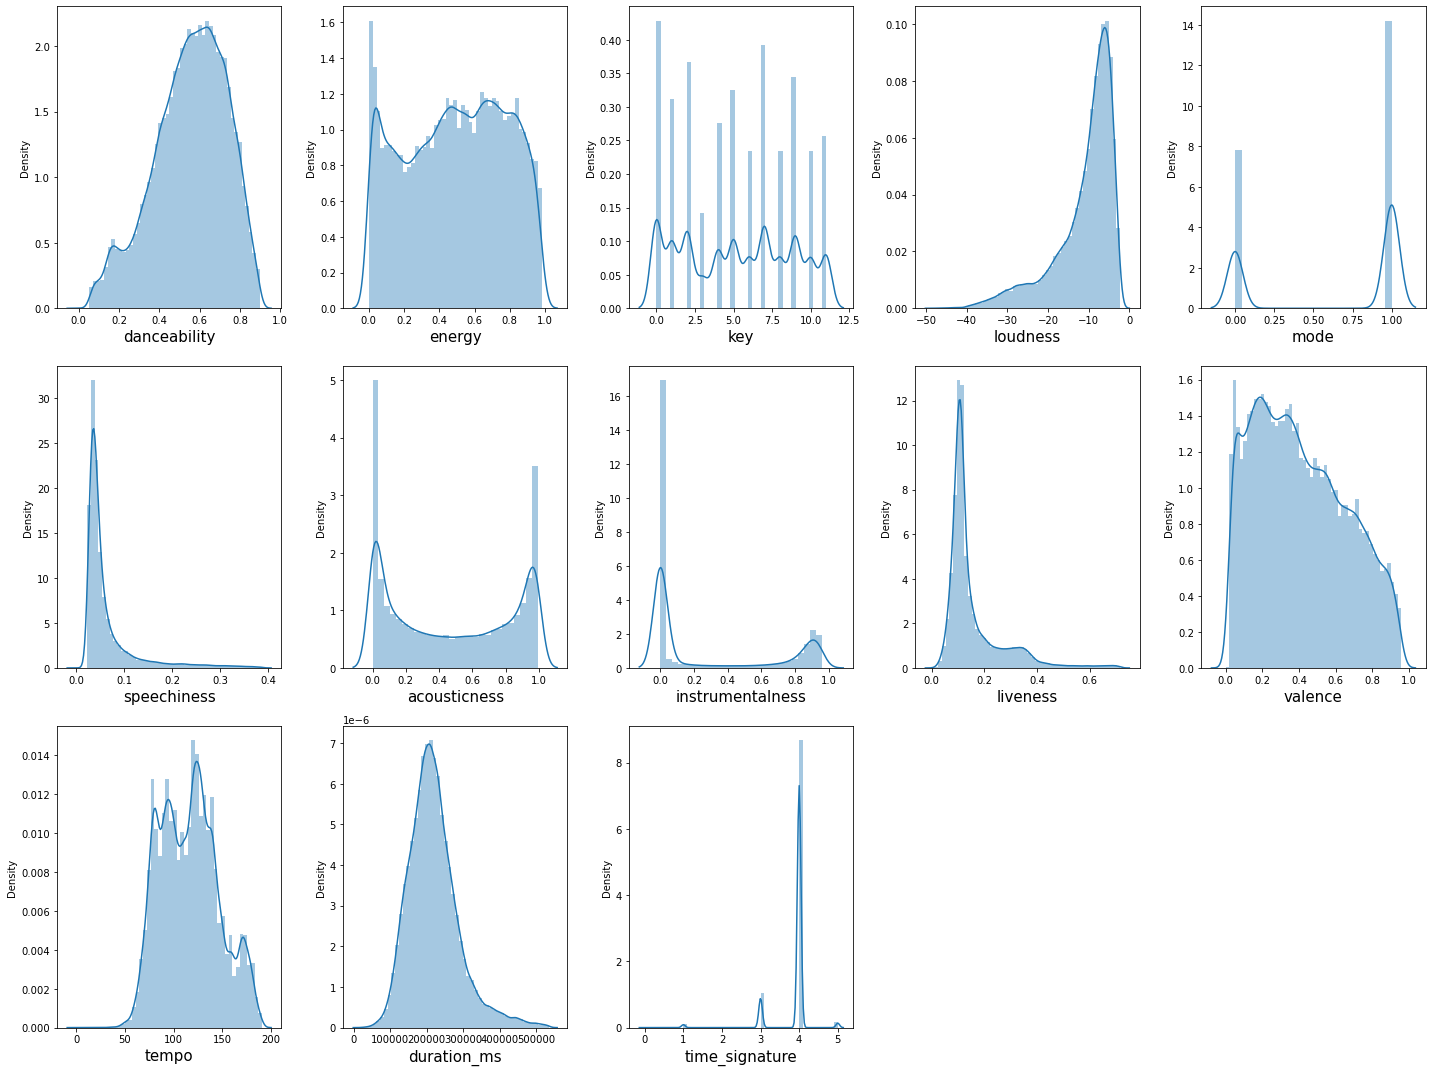

In [136]:
plt.figure(figsize = (20, 15))
plotnumber = 1
for column in df.drop(['genre'],axis=1):
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

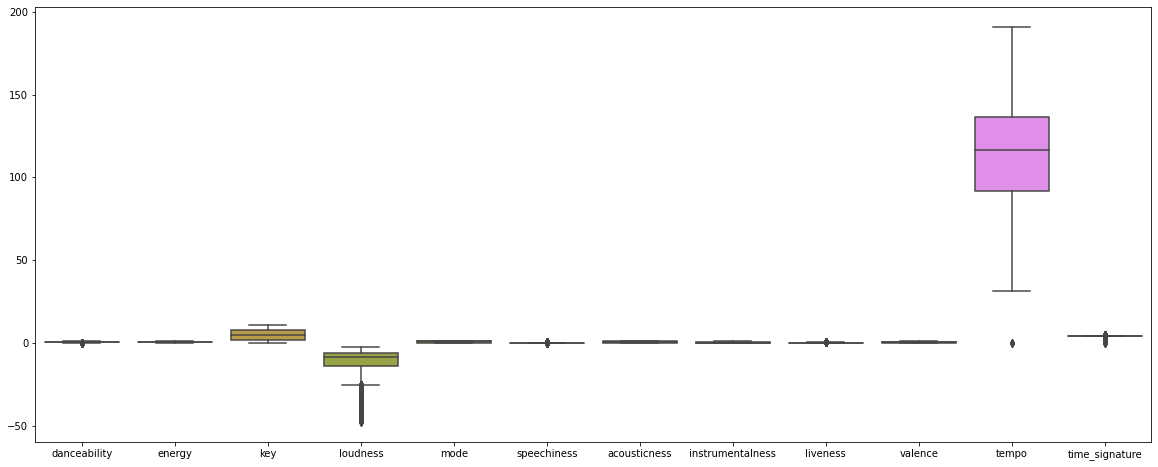

In [137]:
plt.figure(figsize = (20, 8))
sns.boxplot(data = df.drop(['duration_ms'],axis=1), width = 0.8)
plt.show()

In [148]:
from scipy.stats import norm, skew #for some statistics
cat_cols = ['genre','key','mode','time_signature']
# Find the skewed  numerical features
skew_features = df.drop(cat_cols, axis=1).apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index
print("There are {} numerical features with Skew > 0.5 :".format(high_skew.shape[0]))
skewness = pd.DataFrame({'Skew' :high_skew})
skew_features.head(10)

There are 4 numerical features with Skew > 0.5 :


speechiness         2.858694
liveness            2.237903
duration_ms         0.995748
instrumentalness    0.816395
valence             0.340151
tempo               0.273228
acousticness        0.087653
energy             -0.106476
danceability       -0.470780
loudness           -1.520624
dtype: float64

In [151]:
# from scipy.special import boxcox1p
# from scipy.stats import boxcox_normmax
# for i in skew_index:
#     df[i] = boxcox1p(df[i], boxcox_normmax(df[i] + 1))

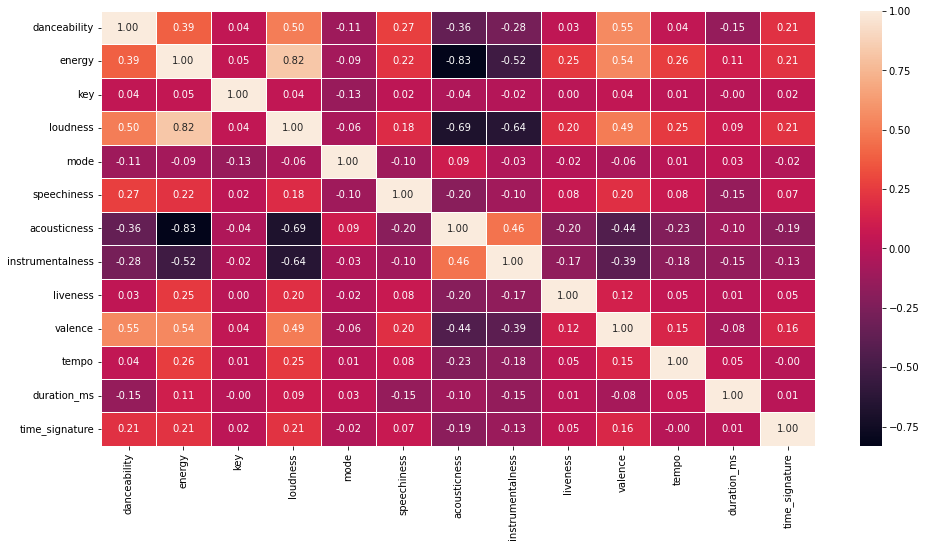

In [138]:
fig, ax = plt.subplots(figsize = (16, 8))
sns.heatmap(df.corr(), annot = True, fmt = '1.2f', annot_kws = {'size' : 10}, linewidth = 1)
plt.show()

In [139]:
from sklearn.utils import shuffle
df = shuffle(df)

In [141]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [142]:
# checking for multicollinearity using `VIF` and `correlation matrix`
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif['Features'] = cols
vif

,VIF,Features
0,1.601623,danceability
1,1.019366,key
2,1.047684,mode
3,1.121873,speechiness
4,1.560820,acousticness
5,1.411942,instrumentalness
6,1.060894,liveness
7,1.679226,valence
8,1.078014,tempo
9,1.105357,duration_ms


In [140]:
X = df.drop(['genre','energy', 'loudness'],axis=1)
y = df[['genre']]
cols = X.columns

In [143]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [105]:
X_train_st = pd.DataFrame(X_train, columns=[cols])
X_test_st = pd.DataFrame(X_test, columns=[cols])

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc=SVC() 
svc.fit(X_train_st,y_train)
y_pred=svc.predict(X_test_st)
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.4202


In [145]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.model_selection import cross_validate,GridSearchCV
reg=XGBClassifier()
# params={"n_estimators":[67,70,100,120],'reg_lambda':[2,1],'gamma':[0,0.3,0.2,0.1]
#        ,'eta':[0.06,0.05,0.04]
#         ,"max_depth":[3,5],'objective':['binary:logistic']}
# clf=GridSearchCV(reg,params,cv=10,n_jobs=-1,verbose=1)
# clf.fit(X_train,y_train)
reg.fit(X_train, y_train)
y_pred=reg.predict(X_test)
# y_pred = clf.predict(X_test)
print(accuracy_score(y_pred,y_test))

[13:00:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.417953227802749


In [3]:
ids = pd.read_csv("ids 2019.csv")
artists = pd.read_csv("artist2019.csv")

In [4]:
ids

,Unnamed: 0,track_id,album_id,artists_id
0,0,6EOKwHETwSkZ9gW2b6ASE0,65T18oWoikW2MAilg9j8lW,['4Ga1P7PMIsmqEZqhYZQgDo']
1,1,0a1LpYLrp1VNwEekoqFJx5,5eDB3cEFNX5W10auAjFPQk,['0kSazizYsGZQYKRfROiVb8']
2,2,1esVK0wgkpFJ31eHvHZ7M9,0sbwoolm9aZGBPBEqoU3CX,['3qNVuliS40BLgXGxhdBdqu']
3,3,1RgSs1Jy3QHiacsnMxAAL2,1fK3kyhjoaQBDofh8Ppfjl,['44T03OWDUjwDgg4IYgFCWi']
4,4,7zFBtYAVURF3bUVqEQ6UUu,2y2Nuvvw5xNDYOunTSsgf1,['2KC9Qb60EaY0kW4eH68vr3']
...,...,...,...,...
27653,27653,2YdyXJ9dZ3XxpB9oLBAgKj,5x8rzbS1fTG31aot2ivcEj,['18eJA6yngcgTKd80ogxfCs']
27654,27654,6tmCkgP4B4Tl333lKetzX8,22d1e9G3IQAa6pK3sV9S5j,['5FhnxR08tvAO0f4ixh3VFD']
27655,27655,3qZaFoWwuh5GRCmTyxbbXW,1lIpey9W9JZCQJuzWBGv4c,"['35LFDqRu6EmXgUqEWeh2j6', '4svvMm4TQnkphZJfhL..."
27656,27656,4GiMCIKbU6R1NKBEJAoWKX,0KqViwaI5HOvFU5Tys8sbm,['1bMzicd9EOrx6iGexZ0AbQ']


In [5]:
artists

,Unnamed: 0,track_id,id,name,followers,genres,popularity
0,0,6EOKwHETwSkZ9gW2b6ASE0,4Ga1P7PMIsmqEZqhYZQgDo,Lil Tecca,5814168,"['melodic rap', 'pluggnb', 'rap', 'trap', 'vir...",79
1,1,0a1LpYLrp1VNwEekoqFJx5,0kSazizYsGZQYKRfROiVb8,Coma,79,[],5
2,2,1esVK0wgkpFJ31eHvHZ7M9,3qNVuliS40BLgXGxhdBdqu,TAEYEON,2703917,"['k-pop', 'pop']",70
3,3,1RgSs1Jy3QHiacsnMxAAL2,44T03OWDUjwDgg4IYgFCWi,MARUV,287582,"['russian pop', 'ukrainian pop']",46
4,4,7zFBtYAVURF3bUVqEQ6UUu,2KC9Qb60EaY0kW4eH68vr3,ITZY,5263838,['k-pop girl group'],76
...,...,...,...,...,...,...,...
9533,9533,1l41tvs85mZdv9WuYmT2Tx,4Dm1MX4VPbtLssAQeBhHFo,Famke Louise,181785,"['dutch hip hop', 'dutch pop', 'dutch rap pop']",46
9534,9534,1l41tvs85mZdv9WuYmT2Tx,1EYdbYpGAuJy6uZo4sVMoM,Idaly,93441,"['dutch hip hop', 'dutch pop', 'dutch rap pop']",65
9535,9535,24vJxXMDQQfVIMkhaOj5oP,2kLUMm1KApZfFb90K0R6d6,Bernt Hulsker,715,[],16
9536,9536,24vJxXMDQQfVIMkhaOj5oP,4KOIqm3HfmXTHdFaxzbg6V,Den nye Mads Hansen,51,[],15


In [6]:
audio_feature

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature
0,0.707,0.883,0,-4.391,0,0.0904,0.5030,0.000002,0.0764,0.947,178.014,5AGkEX0nP1Pa9pVshupHBe,234607,4
1,0.546,0.285,0,-10.237,0,0.0339,0.2740,0.109000,0.0768,0.147,120.112,69HvmK75WgBbmh6aJsz84U,240000,3
2,0.193,0.322,0,-17.323,0,0.0300,0.3990,0.884000,0.1420,0.270,100.007,3jV2CmcxvOF5vvWM3Pyngf,185507,4
3,0.754,0.730,0,-3.169,0,0.0464,0.2380,0.000112,0.0891,0.274,154.044,0AoF4PffeD5NdvpiBihp6Q,178173,4
4,0.682,0.657,0,-7.258,0,0.0882,0.0855,0.023400,0.2170,0.386,115.058,1VeSIXPVrMqrpr8xOyUloh,187453,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164779,0.749,0.671,11,-7.741,1,0.0568,0.0446,0.000000,0.1010,0.120,113.077,0QetVR4wwvyiTezQeFNdeZ,256131,4
164780,0.731,0.867,11,-5.881,1,0.0320,0.0395,0.000000,0.0861,0.776,104.019,3cfOd4CMv2snFaKAnMdnvK,200373,4
164781,0.677,0.857,11,-3.995,1,0.3850,0.0210,0.000000,0.1610,0.787,87.599,0XCRGMDfxqOIl6TqGDcYoE,219500,4
164782,0.680,0.730,11,-6.175,1,0.0911,0.1290,0.000000,0.1010,0.385,91.988,5Rlcx4jMCAiiWd56e7VEZ5,232412,4


In [7]:
df = pd.merge(artists, audio_feature, how="inner", left_on="track_id", right_on="id")
df

,Unnamed: 0,track_id,id_x,name,followers,genres,popularity,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id_y,duration_ms,time_signature
0,0,6EOKwHETwSkZ9gW2b6ASE0,4Ga1P7PMIsmqEZqhYZQgDo,Lil Tecca,5814168,"['melodic rap', 'pluggnb', 'rap', 'trap', 'vir...",79,0.745,0.642,7,...,0,0.2870,0.02040,0.000000,0.0658,0.226,179.974,6EOKwHETwSkZ9gW2b6ASE0,131240,4
1,1,0a1LpYLrp1VNwEekoqFJx5,0kSazizYsGZQYKRfROiVb8,Coma,79,[],5,0.539,0.499,11,...,0,0.0477,0.10300,0.000008,0.1060,0.140,148.900,0a1LpYLrp1VNwEekoqFJx5,222282,4
2,2,1esVK0wgkpFJ31eHvHZ7M9,3qNVuliS40BLgXGxhdBdqu,TAEYEON,2703917,"['k-pop', 'pop']",70,0.509,0.816,2,...,1,0.0612,0.22400,0.000000,0.2190,0.641,159.844,1esVK0wgkpFJ31eHvHZ7M9,191988,4
3,3,1RgSs1Jy3QHiacsnMxAAL2,44T03OWDUjwDgg4IYgFCWi,MARUV,287582,"['russian pop', 'ukrainian pop']",46,0.729,0.792,4,...,0,0.0334,0.03900,0.006220,0.1040,0.667,115.024,1RgSs1Jy3QHiacsnMxAAL2,171130,4
4,4,7zFBtYAVURF3bUVqEQ6UUu,2KC9Qb60EaY0kW4eH68vr3,ITZY,5263838,['k-pop girl group'],76,0.801,0.904,2,...,1,0.0834,0.03240,0.000031,0.1820,0.814,124.979,7zFBtYAVURF3bUVqEQ6UUu,191142,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9533,9533,1l41tvs85mZdv9WuYmT2Tx,4Dm1MX4VPbtLssAQeBhHFo,Famke Louise,181785,"['dutch hip hop', 'dutch pop', 'dutch rap pop']",46,0.759,0.594,4,...,0,0.1770,0.25400,0.001660,0.1060,0.330,180.010,1l41tvs85mZdv9WuYmT2Tx,195616,4
9534,9534,1l41tvs85mZdv9WuYmT2Tx,1EYdbYpGAuJy6uZo4sVMoM,Idaly,93441,"['dutch hip hop', 'dutch pop', 'dutch rap pop']",65,0.759,0.594,4,...,0,0.1770,0.25400,0.001660,0.1060,0.330,180.010,1l41tvs85mZdv9WuYmT2Tx,195616,4
9535,9535,24vJxXMDQQfVIMkhaOj5oP,2kLUMm1KApZfFb90K0R6d6,Bernt Hulsker,715,[],16,0.736,0.720,0,...,1,0.0603,0.08720,0.000000,0.3730,0.809,99.984,24vJxXMDQQfVIMkhaOj5oP,169216,4
9536,9536,24vJxXMDQQfVIMkhaOj5oP,4KOIqm3HfmXTHdFaxzbg6V,Den nye Mads Hansen,51,[],15,0.736,0.720,0,...,1,0.0603,0.08720,0.000000,0.3730,0.809,99.984,24vJxXMDQQfVIMkhaOj5oP,169216,4


In [8]:
df.columns

Index(['Unnamed: 0', 'track_id', 'id_x', 'name', 'followers', 'genres',
       'popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'id_y', 'duration_ms', 'time_signature'],
      dtype='object')

## duplicate rows 

In [9]:
df = df.drop(['Unnamed: 0', 'track_id', 'id_x', 'name', 'followers', 'id_y', 'duration_ms', 'time_signature'], axis=1)

In [37]:
newdf = pd.DataFrame(columns=df.columns)
newdf

,genres,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo


In [45]:
for i in range(0, df.shape[0]): # running time: - 19
    row = df.iloc[i]
    genres = row[0].strip('][').split(', ')
    # genres = row[0]
    others = row[1:]
    # new_row = pd.Series(genres[0]).append(others)
    for genre in genres:
        new_row = pd.Series(genre, index = ['genres']).append(others)
        newdf = newdf.append(new_row, ignore_index=True)

In [46]:
len(newdf['genres'].value_counts())

1380

In [51]:
newdf

,genres,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,'melodic rap',79,0.745,0.642,7,-6.257,0,0.2870,0.02040,0.00000,0.0658,0.226,179.974
1,'pluggnb',79,0.745,0.642,7,-6.257,0,0.2870,0.02040,0.00000,0.0658,0.226,179.974
2,'rap',79,0.745,0.642,7,-6.257,0,0.2870,0.02040,0.00000,0.0658,0.226,179.974
3,'trap',79,0.745,0.642,7,-6.257,0,0.2870,0.02040,0.00000,0.0658,0.226,179.974
4,'viral rap',79,0.745,0.642,7,-6.257,0,0.2870,0.02040,0.00000,0.0658,0.226,179.974
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30783,'dutch pop',65,0.759,0.594,4,-5.141,0,0.1770,0.25400,0.00166,0.1060,0.330,180.010
30784,'dutch rap pop',65,0.759,0.594,4,-5.141,0,0.1770,0.25400,0.00166,0.1060,0.330,180.010
30785,,16,0.736,0.720,0,-6.407,1,0.0603,0.08720,0.00000,0.3730,0.809,99.984
30786,,15,0.736,0.720,0,-6.407,1,0.0603,0.08720,0.00000,0.3730,0.809,99.984


In [52]:
from sklearn.utils import shuffle
newdf_sh = shuffle(newdf)

In [53]:
from sklearn.model_selection import train_test_split
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(newdf_sh.drop("genres",axis=1), newdf_sh["genres"], test_size=0.2, random_state=42)

In [54]:
cols = new_X_train.columns

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
new_X_train_st = scaler.fit_transform(new_X_train)
new_X_test_st = scaler.transform(new_X_test)

new_X_train_st = pd.DataFrame(new_X_train_st, columns=[cols])
new_X_test_st = pd.DataFrame(new_X_test_st, columns=[cols])

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc=SVC() 
svc.fit(new_X_train_st,new_y_train)
new_y_pred=svc.predict(new_X_test_st)
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(new_y_test, new_y_pred)))

Model accuracy score with default hyperparameters: 0.1062


https://www.kaggle.com/code/arthurlees/spotify-song-attribute-analysis

In [14]:
tracks = pd.read_excel("spotify_genre_final.xlsx")
tracks.head()

,Genre,Title,Album_cover_link,Artist,duration_ms,explicit,id,popularity,release_date,release_date_precision,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,rock,Baba O'Riley,https://i.scdn.co/image/ab67616d0000b273fe24dc...,The Who,300400,False,3qiyyUfYe7CRYLucrPmulD,75,1971-08-14,day,...,5,-8.367,1,0.0352,0.31300,0.185000,0.2870,0.150,117.292,4
1,rock,More Than a Feeling,https://i.scdn.co/image/ab67616d0000b27390ef97...,Boston,285133,False,1QEEqeFIZktqIpPI4jSVSF,78,1976,year,...,7,-8.039,1,0.0298,0.00088,0.002300,0.0504,0.285,108.789,4
2,rock,(Don't Fear) The Reaper,https://i.scdn.co/image/ab67616d0000b2733ac318...,Blue Öyster Cult,308120,False,5QTxFnGygVM4jFQiBovmRo,76,1976,year,...,9,-8.550,0,0.0733,0.00290,0.000208,0.2970,0.385,141.466,4
3,rock,Jump - 2015 Remaster,https://i.scdn.co/image/ab67616d0000b273b414c6...,Van Halen,241599,False,7N3PAbqfTjSEU1edb2tY8j,78,1984-01-04,day,...,0,-6.219,1,0.0317,0.17100,0.000377,0.0702,0.795,129.981,4
4,rock,Stairway to Heaven - Remaster,https://i.scdn.co/image/ab67616d0000b273c8a11e...,Led Zeppelin,482830,False,5CQ30WqJwcep0pYcV4AMNc,79,1971-11-08,day,...,9,-12.049,0,0.0339,0.58000,0.003200,0.1160,0.197,82.433,4


In [15]:
tracks.shape

(6917, 23)

In [16]:
# audio_feature.shape

In [17]:
# df = pd.merge(tracks, audio_feature, on="id", how="inner")
# df.shape

In [18]:
tracks["Genre"].value_counts()

pop       1161
rock      1136
latin     1036
hiphop     971
edm        956
rap        926
r&b        731
Name: Genre, dtype: int64

In [19]:
from sklearn.utils import shuffle
tracks = shuffle(tracks)
tracks.head()

,Genre,Title,Album_cover_link,Artist,duration_ms,explicit,id,popularity,release_date,release_date_precision,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
435,rock,Rita Is Gone,https://i.scdn.co/image/ab67616d0000b2737077a5...,The Marcus King Band,265586,False,4gi81cgaU0Xmek1IuOENM5,59,2016-10-07,day,...,5,-8.216,1,0.0348,0.86600,0.067500,0.0891,0.802,86.726,4
3238,latin,Que Lo Nuestro Se Quede Nuestro,https://i.scdn.co/image/ab67616d0000b273c28f79...,Carlos Rivera,222826,False,3rtxFFGZ10e2vYBo7PsPf2,70,2016-02-05,day,...,4,-8.583,0,0.0270,0.48800,0.000023,0.1660,0.294,144.092,4
4464,pop,B.E.D.,https://i.scdn.co/image/ab67616d0000b273276ce8...,Jacquees,236146,True,1B6TmCvKjC4dopBohVW51x,71,2018-09-07,day,...,1,-6.501,1,0.0587,0.00368,0.000000,0.0968,0.193,122.022,4
2876,edm,Crazy Love,https://i.scdn.co/image/ab67616d0000b273e254de...,Audien,174545,False,1gwwNLcYQRnzvkBhwDjUX3,54,2016-08-19,day,...,11,-1.326,0,0.0488,0.31800,0.000024,0.0742,0.606,109.982,4
3636,latin,Lo Que Tenías Conmigo,https://i.scdn.co/image/ab67616d0000b2737b88bd...,María José,233813,False,0X6coWomPnfGLXQ6gdi3cI,68,2019-05-10,day,...,9,-3.124,1,0.0346,0.05170,0.000000,0.0829,0.230,147.627,4


In [20]:
tracks.columns

Index(['Genre', 'Title', 'Album_cover_link', 'Artist', 'duration_ms',
       'explicit', 'id', 'popularity', 'release_date',
       'release_date_precision', 'total_tracks', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

In [21]:
# df = df.drop(['Title', 'Album_cover_link', 'Artist', 'id', 'popularity', 'release_date',
#               'release_date_precision', 'total_tracks', 'int64_field_0', 'type', 'uri', 'track_href',
#               'analysis_url','uri', 'track_href', 'analysis_url'], axis = 1)
tracks = tracks.drop(['Title', 'Album_cover_link', 'Artist', 'id', 'release_date', 
              'release_date_precision', 'total_tracks', 'time_signature'],axis=1)
tracks

,Genre,duration_ms,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
435,rock,265586,False,59,0.623,0.440,5,-8.216,1,0.0348,0.86600,0.067500,0.0891,0.802,86.726
3238,latin,222826,False,70,0.464,0.444,4,-8.583,0,0.0270,0.48800,0.000023,0.1660,0.294,144.092
4464,pop,236146,True,71,0.739,0.536,1,-6.501,1,0.0587,0.00368,0.000000,0.0968,0.193,122.022
2876,edm,174545,False,54,0.691,0.883,11,-1.326,0,0.0488,0.31800,0.000024,0.0742,0.606,109.982
3636,latin,233813,False,68,0.475,0.788,9,-3.124,1,0.0346,0.05170,0.000000,0.0829,0.230,147.627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4387,pop,200266,False,62,0.603,0.512,10,-6.687,0,0.0402,0.45400,0.000140,0.1540,0.271,145.910
6827,r&b,314866,False,51,0.527,0.389,7,-11.687,0,0.0302,0.72000,0.000000,0.0997,0.458,119.939
297,rock,297146,False,65,0.580,0.627,11,-8.017,1,0.0316,0.05000,0.000002,0.2970,0.825,82.151
1953,rap,167409,True,59,0.869,0.672,7,-5.660,0,0.2090,0.18400,0.000000,0.0760,0.813,120.954


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tracks.drop("Genre",axis=1), tracks["Genre"], test_size=0.2, random_state=42)

In [23]:
X_train.shape

(5533, 14)

In [24]:
X_test.shape

(1384, 14)

In [25]:
y_train.shape

(5533,)

In [26]:
cols = X_train.columns

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

X_train_st = pd.DataFrame(X_train_st, columns=[cols])
X_test_st = pd.DataFrame(X_test_st, columns=[cols])

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc=SVC() 
svc.fit(X_train_st,y_train)
y_pred=svc.predict(X_test_st)
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
# 0.5845

Model accuracy score with default hyperparameters: 0.5585
